**STROKE RISK DETECTOR**

**XGBoost Classifier Model**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
#Loading the dataset
df = pd.read_excel(r"C:\Users\taran\OneDrive\Documents\ML Datasets\stroke_risk_dataset.xlsx")
print(f"Shape: {df.shape}")
df.head()

Shape: (35000, 19)


,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


**Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [5]:
df.isnull().sum()

age                       0
gender                    0
chest_pain                0
high_blood_pressure       0
irregular_heartbeat       0
shortness_of_breath       0
fatigue_weakness          0
dizziness                 0
swelling_edema            0
neck_jaw_pain             0
excessive_sweating        0
persistent_cough          0
nausea_vomiting           0
chest_discomfort          0
cold_hands_feet           0
snoring_sleep_apnea       0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64

In [60]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})

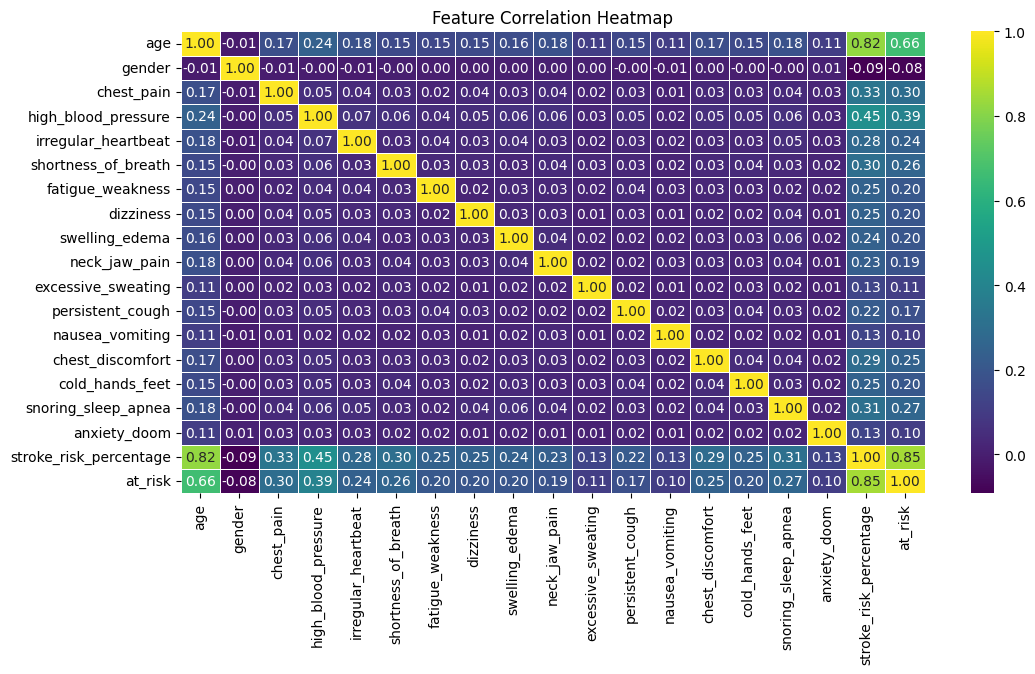

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

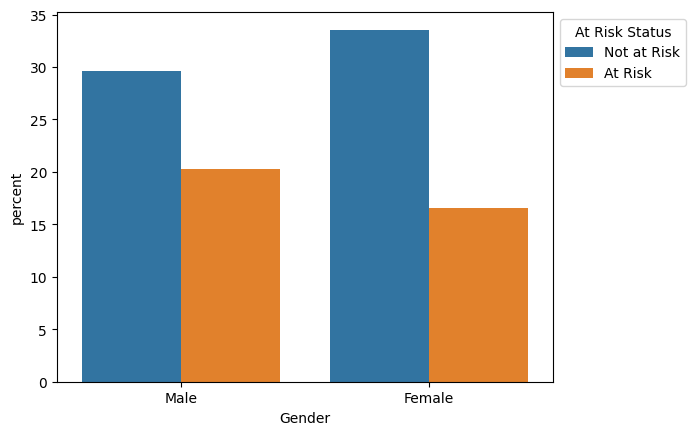

In [17]:
sns.countplot(x=df['gender'].map({0: 'Male', 1: 'Female'}),
              hue=df['at_risk'].map({0: 'Not at Risk', 1: 'At Risk'}), 
              stat='percent')
plt.legend(title="At Risk Status", loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Gender')
plt.show()

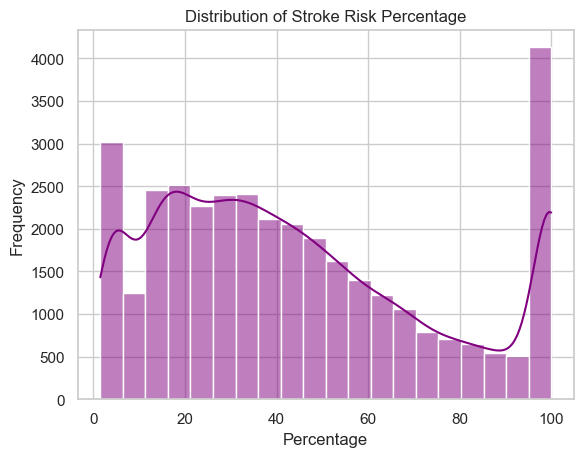

In [84]:
sns.histplot(x=df['stroke_risk_percentage'], kde=True, color="purple", bins=20)
plt.title('Distribution of Stroke Risk Percentage')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

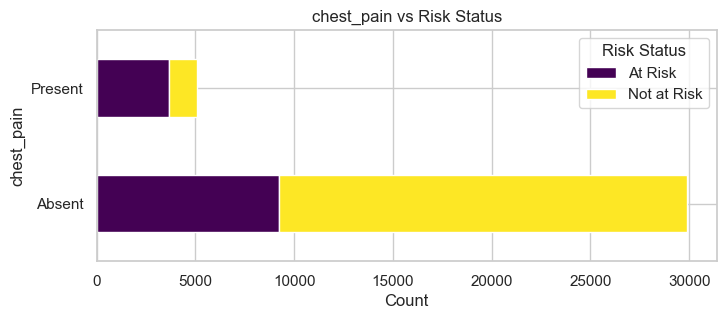

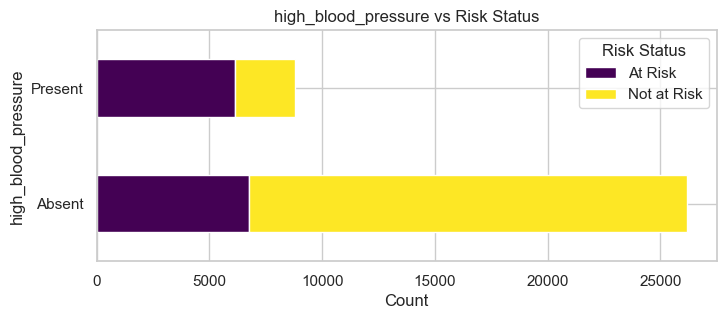

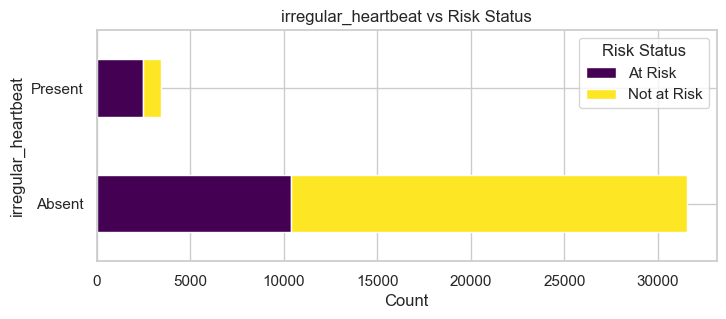

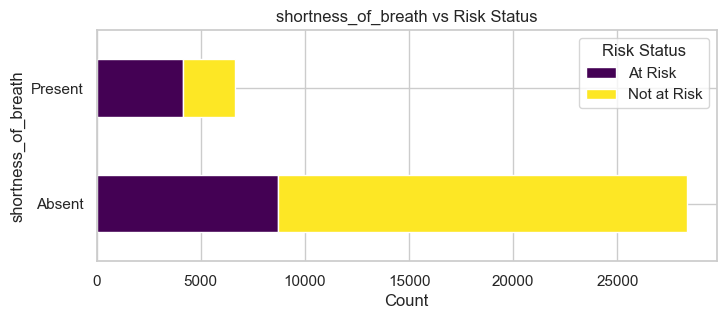

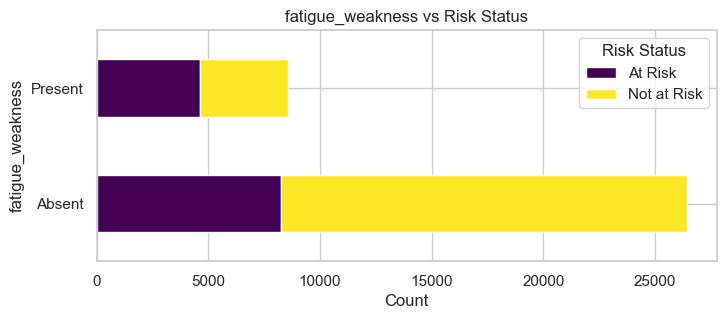

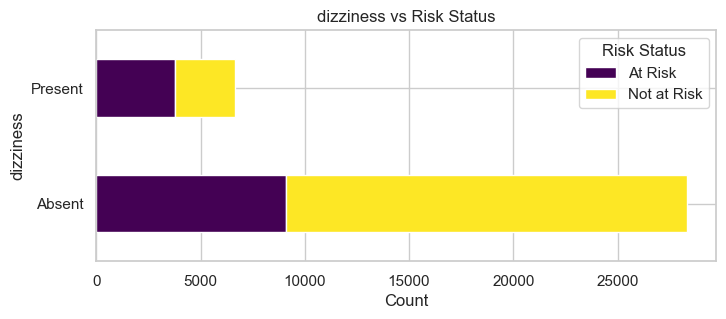

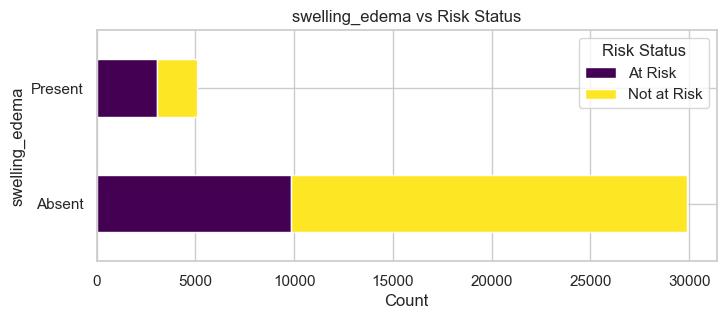

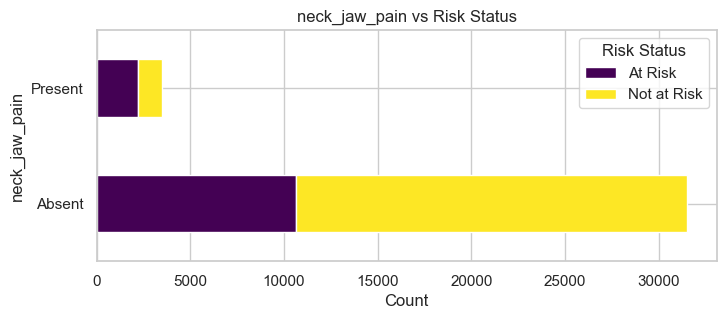

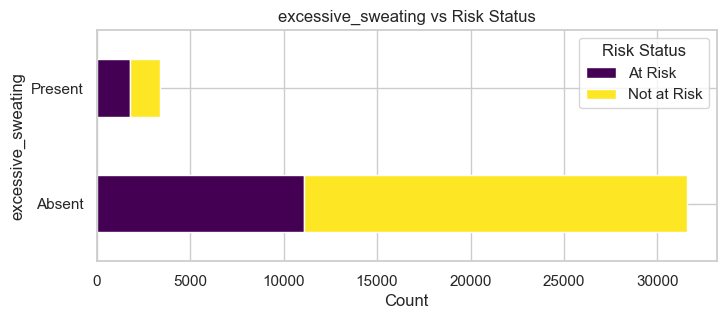

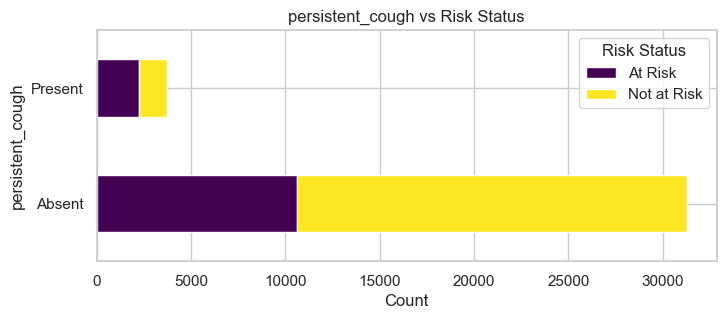

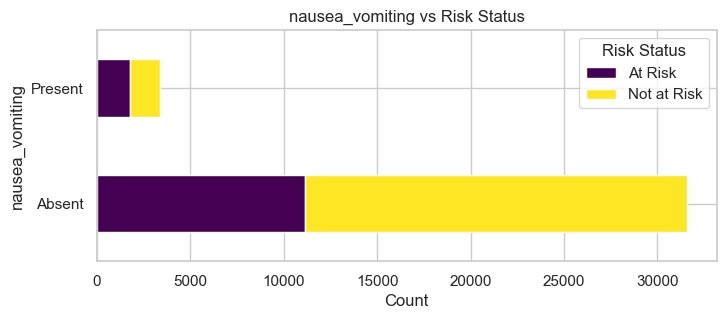

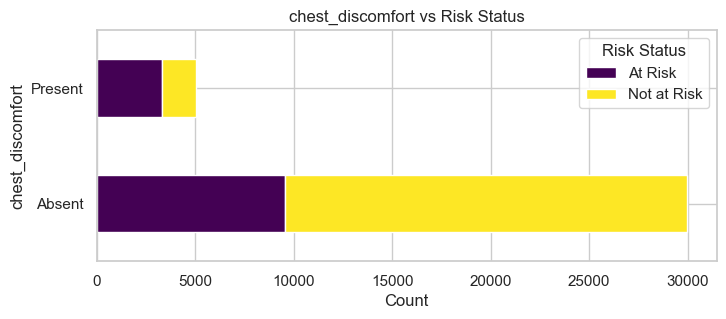

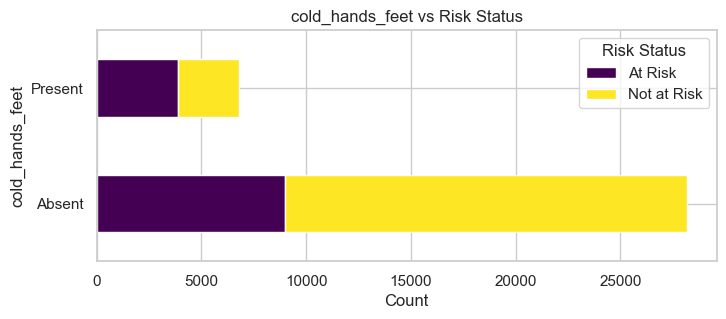

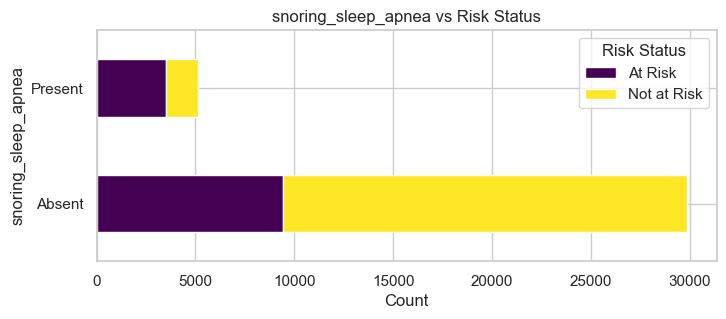

In [20]:
sns.set(style='whitegrid')

for col in df.columns[2:16]:
    crosstab_result = pd.crosstab(df[col].map({0:'Absent', 1:'Present'}), df['at_risk'].map({0:'Not at Risk', 1:'At Risk'}))
    ax = crosstab_result.plot(kind='barh', stacked=True, figsize=(8, 3), colormap="viridis")
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.title(f"{col} vs Risk Status")
    plt.legend(title="Risk Status", labels=crosstab_result.columns.to_list())
    plt.show()

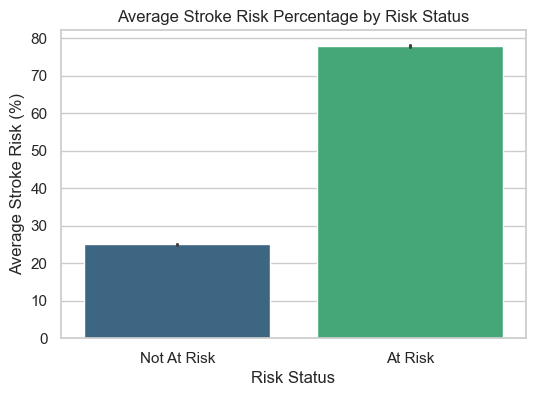

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["at_risk"].map({0:"Not At Risk", 1:"At Risk"}), 
            y=df["stroke_risk_percentage"], 
            hue=df["at_risk"],  
            estimator=lambda x: sum(x)/len(x), 
            palette="viridis", 
            legend=False)

plt.xlabel("Risk Status")
plt.ylabel("Average Stroke Risk (%)")
plt.title("Average Stroke Risk Percentage by Risk Status")

plt.show()

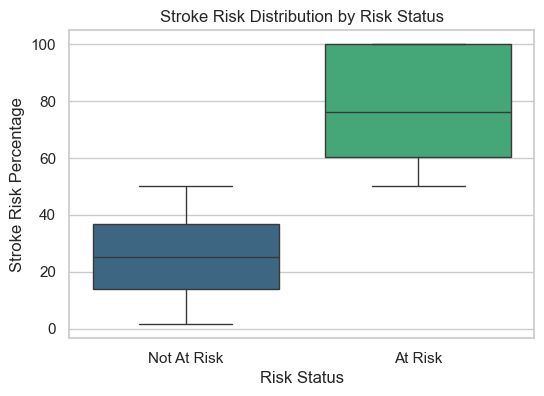

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["at_risk"].map({0:"Not At Risk", 1:"At Risk"}), 
            y=df["stroke_risk_percentage"], 
            hue=df["at_risk"], 
            legend=False, 
            palette="viridis")

plt.xlabel("Risk Status")
plt.ylabel("Stroke Risk Percentage")
plt.title("Stroke Risk Distribution by Risk Status")
plt.show()


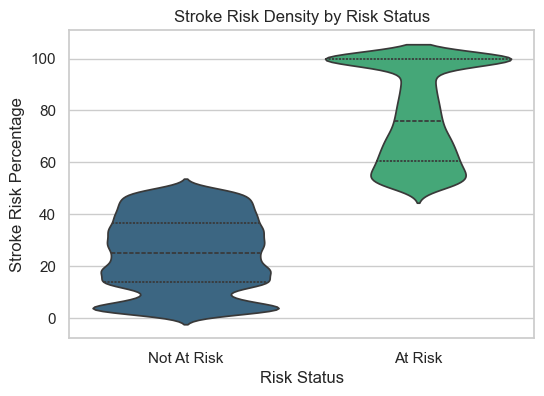

In [34]:
plt.figure(figsize=(6,4))
sns.violinplot(x=df["at_risk"].map({0:"Not At Risk", 1:"At Risk"}), 
               y=df["stroke_risk_percentage"], 
               hue=df["at_risk"], 
               legend=False, 
               palette="viridis", 
               inner="quartile")

plt.xlabel("Risk Status")
plt.ylabel("Stroke Risk Percentage")
plt.title("Stroke Risk Density by Risk Status")
plt.show()


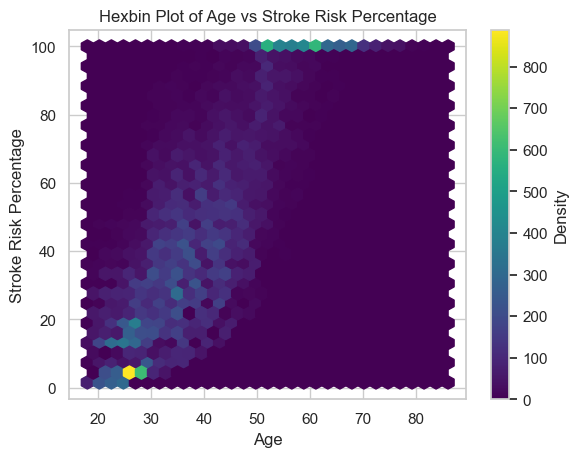

In [57]:
plt.hexbin(df["age"], df["stroke_risk_percentage"], gridsize=30, cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Stroke Risk Percentage")
plt.colorbar(label="Density")  # Adds a color legend
plt.title("Hexbin Plot of Age vs Stroke Risk Percentage")
plt.show()

**Data Preprocessing**

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'stroke_risk_percentage']] = scaler.fit_transform(df[['age', 'stroke_risk_percentage']])

In [61]:
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,-1.438103,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.374129,0
1,1.156163,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1.857119,1
2,2.107394,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.857119,1
3,0.204932,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.000533,0
4,1.242639,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1.348649,1


In [62]:
X = df.drop(columns=['at_risk'])
y = df['at_risk']

#Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Applying GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,  
    param_grid=param_grid,  
    scoring='accuracy',  
    cv=5,  # 5-Fold Cross-Validation
    verbose=1,  
    n_jobs=-1  # Use all CPU cores
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


**Training the Model**

In [41]:
best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred = best_xgb.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9998571428571429


In [44]:
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4467
           1       1.00      1.00      1.00      2533

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



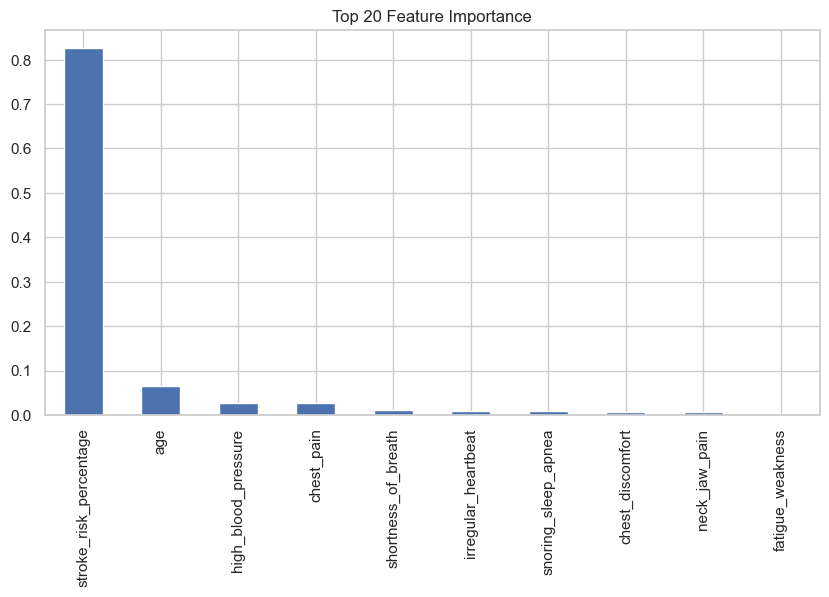

In [46]:
feature_importance = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title="Top 20 Feature Importance")
plt.show()

In [47]:
X_train_reduced = X_train.drop(columns=['stroke_risk_percentage'])
X_test_reduced = X_test.drop(columns=['stroke_risk_percentage'])

model_new = XGBClassifier()
model_new.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred_new = model_new.predict(X_test_reduced)

In [49]:
accuracy = accuracy_score(y_test, y_pred_new)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9875714285714285


In [50]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_new))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4467
           1       0.99      0.97      0.98      2533

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [63]:
X_train_reduced = X_train.drop(columns=['stroke_risk_percentage'])
X_test_reduced = X_test.drop(columns=['stroke_risk_percentage'])

In [64]:
best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred = best_xgb.predict(X_test_reduced)

In [66]:
accuracy = accuracy_score(y_test, y_pred_new)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9875714285714285
